# Linear Regression Project

In this project we will build Linear Regression model to predict home prices in Bangalore.

## Data exploring

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import numpy as np

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

We will assume that we don't need some of features in our data so we will drop some of them and pick only few to make our project simple.

In [4]:
#droping columns
df2=df.drop(["area_type","availability","society","balcony"],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
#calculating null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since we have 13 320 rows and we got 73 rows with null values we could just drop them. But we are going to replace null values in bath column with median.

In [6]:
bath_median=df2["bath"].median()
bath_median

2.0

In [7]:
#filling null values with median
df2["bath"]=df2["bath"].fillna(bath_median)

In [8]:
#recalculating null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

We can see that we replaced null values with median. Now we are going to drop the rest null values.

In [9]:
#droping null values
df3=df2.dropna()

In [10]:
#recalculating null values
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
#exploring size column
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

We can see that we have strings "BHK" and "Bedroom" so we will split our values and pick only first which is number and make new column with those values.

In [12]:
#making new column
df3["bedroom"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

<ipython-input-12-9577f7e9a8ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bedroom"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3["bedroom"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see that we have range values in out total_sqft column. We are going to define a function that will show us which values are float and which are not.

In [15]:
#defining function
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [16]:
#returning values that are not float
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


We are going to make a function that takes in range values and return average value of those two numbers and ignores the values that contains a string.

In [17]:
def converting(x):
    tokens=x.split("-") #splitting on "-"
    if len (tokens)== 2:
        return (float(tokens[0])+float(tokens[1]))/2 #returning average values
    try:
        return float(x) #return float
    except:
        return None #ignore value that is not float

In [18]:
df4=df3.copy()

In [19]:
#applying function
df4["total_sqft"]=df3["total_sqft"].apply(converting)

In [20]:
#checking function on index row 30
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bedroom               4
Name: 30, dtype: object

We can see that our function did good job. First it was range from 2100 to 2850 and now it is average 2475.

In [21]:
df4.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


We will make new column that will have values of price per square feet which we will use to identify outliers.

In [22]:
df5=df4.copy()

In [23]:
df5["price_per_sqft"]=df4["price"]*100000/df4["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
#exploring location column
len(df5["location"].unique())

1304

In [25]:
#removing spaces 
df5["location"]=df5["location"].apply(lambda x: x.strip())

In [26]:
#counting values in location
location_stat=df5["location"].value_counts()
location_stat

Whitefield                540
Sarjapur  Road            397
Electronic City           304
Kanakpura Road            273
Thanisandra               237
                         ... 
K N Extension               1
Bilal Nagar                 1
arudi                       1
Kanakapura main  Road       1
Vijayabank bank layout      1
Name: location, Length: 1293, dtype: int64

We can see that we have a lot of rows with only 1 unique values of location. Because of that we will make function that will put all values that are less then 15 in "other" category.

In [27]:
len(location_stat[location_stat<15])

1107

In [28]:
location_less_15=location_stat[location_stat<15]
location_less_15

Giri Nagar                14
NGR Layout                14
1st Block Jayanagar       14
Murugeshpalya             14
NRI Layout                14
                          ..
K N Extension              1
Bilal Nagar                1
arudi                      1
Kanakapura main  Road      1
Vijayabank bank layout     1
Name: location, Length: 1107, dtype: int64

In [29]:
df5["location"]=df5["location"].apply(lambda x: "other" if x in location_less_15 else x) 

In [30]:
len(df5["location"].unique())

187

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outliers

Let's assume that typicial threshold for sguare feet per bedroom is 300 so we will use this criteria to find outliers.

In [32]:
df5[df5["total_sqft"]/df5["bedroom"]<300].head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


We can see that in 1020 sqft we have 6 bedrooms which is unusual and also in 600 sqft we have 8 bedrooms. We will remove those rows.

In [33]:
df5.shape

(13303, 7)

In [34]:
df6=df5[df5["total_sqft"]/df5["bedroom"]>=300]

In [35]:
df6.shape

(12513, 7)

In [36]:
df6["price_per_sqft"].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

We are going to use function that will remove all outliers. And we will find outliers per location using mean and standard deviation.

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft) #mean
        st = np.std(subdf.price_per_sqft) #standard deviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10390, 7)

In [38]:
df7["price_per_sqft"].describe()

count    10390.000000
mean      5623.564954
std       2161.899610
min       1250.000000
25%       4237.918216
50%       5166.666667
75%       6414.979565
max      21875.000000
Name: price_per_sqft, dtype: float64

Now we will make function that will plot us two bedroom apartment with same sqft as three bedroom.

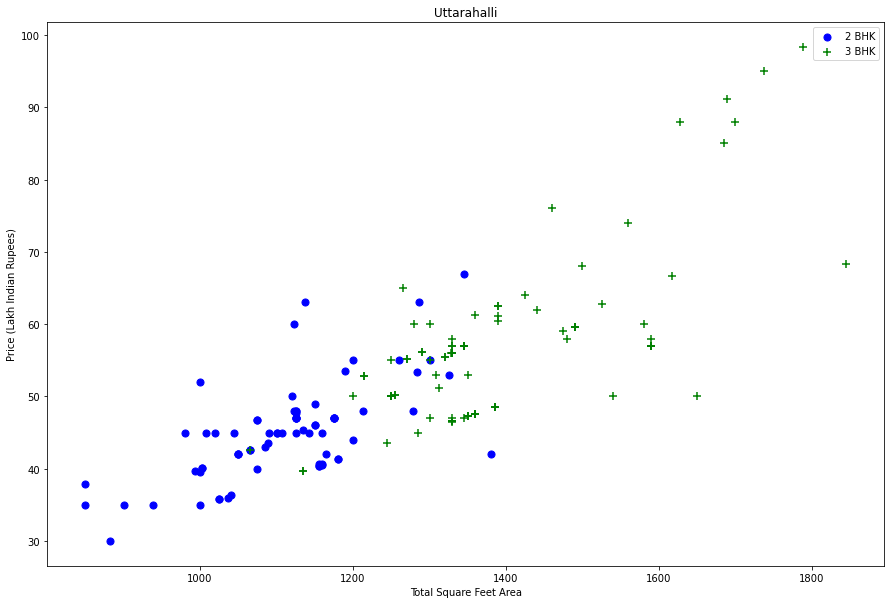

In [39]:
def plot_bedroom(df,location):
    b2 = df[(df.location==location) & (df.bedroom==2)]
    b3 = df[(df.location==location) & (df.bedroom==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(b2.total_sqft,b2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(b3.total_sqft,b3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_bedroom(df7,"Uttarahalli")

We can see that we have 2 bedroom apartments with same sqft that cost more then 3 bedroom apartmen with same sqft. For example 2 bedroom apartments with 1100 sqft costs more then 3 bedroom apartment with same sqft.

We will now write a function that will remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).

In [40]:
def remove_b_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): #grouping by location
        bedroom_stats = {}
        for b, b_df in location_df.groupby('bedroom'): # grouping by bedroom in location groupby
            bedroom_stats[b] = {                       #dictionary with mean,standard deviation and count
                'mean': np.mean(b_df.price_per_sqft),
                'std': np.std(b_df.price_per_sqft),
                'count': b_df.shape[0]
            }
        for b, b_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(b-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, b_df[b_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_b_outliers(df7)
df8.shape

(7176, 7)

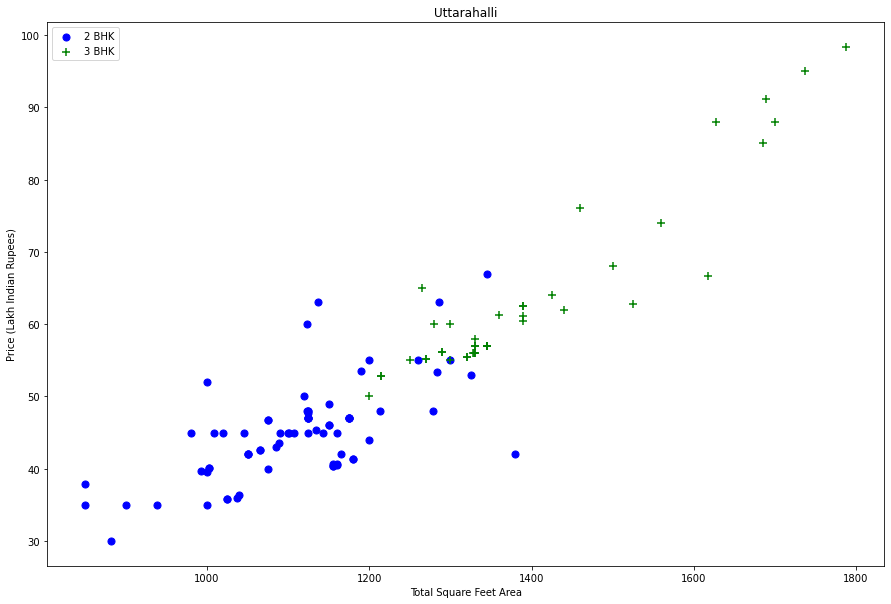

In [41]:
plot_bedroom(df8,"Uttarahalli")

We still have some errors but we cleaned a lot of outliers.

Text(0, 0.5, 'Count')

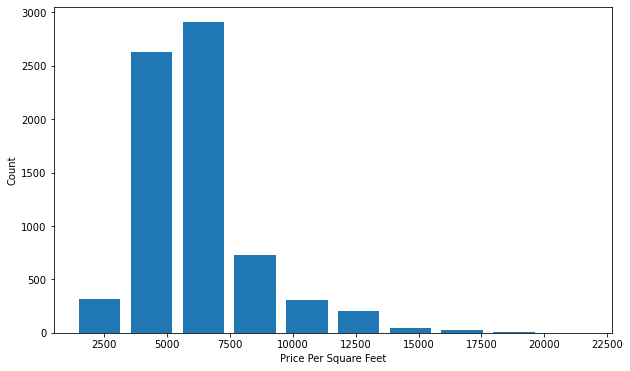

In [42]:
#Plotting histogram
plt.figure(figsize=(10,6))
plt.hist(df8["price_per_sqft"],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

We can see that we have normal distribution.

In [43]:
#exploring bathrooms
df8["bath"].unique()

array([ 3.,  5.,  4.,  2.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

We can see that we have some apartments with more then 10 bathroom. Let's explore.

In [44]:
df8[df8["bath"]>10].head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
8216,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8331,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9227,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9366,other,10 BHK,4000.0,12.0,160.0,10,4000.000000
9648,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

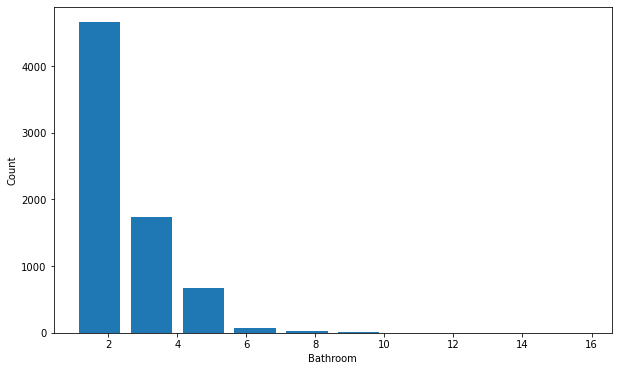

In [45]:
#Plotting histogram
plt.figure(figsize=(10,6))
plt.hist(df8["bath"],rwidth=0.8)
plt.xlabel("Bathroom")
plt.ylabel("Count")

The most of apartments have 2 bathrooms. Let's assume we got task to remove apartments where number of bathrooms is greater by +2  then number of bedrooms.

In [46]:
df8[df8["bath"]>df8["bedroom"]+2]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
6343,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8117,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9958,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


We have 3 outliers which we will remove.

In [47]:
df9=df8[df8["bath"]<df8["bedroom"]+2]
df9.shape

(7098, 7)

## Preparing data

We will drop columns that we don't need to use.

In [48]:
df10=df9.drop(["size","price_per_sqft"],axis=1)
df10.head()

,location,total_sqft,bath,price,bedroom
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2


Now we will transfrom categorical column which is location into numerical by using dummy function.

In [49]:
#function for creating dummy columns
dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df11 = pd.concat([df10,dummies.drop("other",axis=1)],axis=1)
df11.head()

,location,total_sqft,bath,price,bedroom,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1500.0,5.0,85.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2065.0,4.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2059.0,3.0,225.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12 = df11.drop("location",axis=1)
df12.head()

,total_sqft,bath,price,bedroom,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,85.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2059.0,3.0,225.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12.shape

(7098, 190)

## Building model

In [53]:
X=df12.drop(["price"],axis=1)
y=df12["price"]

In [54]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=10)

### Linear Regression model

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()

In [57]:
#fitting the model
lr.fit(train_X,train_y)

LinearRegression()

In [58]:
# Evaluate score of model
lr.score(test_X,test_y)

0.8489924716790557

### K-Fold cross validation

In [59]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #randomize samples

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85476863, 0.80020954, 0.86259223, 0.84013658, 0.84426355])

### Grid search 

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [61]:
#function for searching best model
def best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [62]:
best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.840394,{'normalize': False}
1,lasso,0.740361,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.659265,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Regression model has the best score.

In [69]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [71]:
df10.sample(5)

,location,total_sqft,bath,price,bedroom
3501,Jalahalli,2086.0,3.0,160.00,3
4645,Mahadevpura,1500.0,2.0,70.00,3
4034,Kanakpura Road,1938.0,3.0,105.00,3
5346,Raja Rajeshwari Nagar,1196.0,2.0,40.54,2
1565,Chikkalasandra,1070.0,2.0,45.48,2


In [89]:
print("Jalahalli:",round(predict_price("Jalahalli",2086,3,3),2))
print("Mahadevpura:",round(predict_price("Mahadevpura",1500,2,3),2))
print("Kanakpura Road:",round(predict_price("Kanakpura Road",1938,3,3),2))
print("Raja Rajeshwari Nagar:",round(predict_price("Raja Rajeshwari Nagar",1196,2,2),2))
print("Chikkalasandra:",round(predict_price("Chikkalasandra",1070,2,2),2))

Jalahalli: 149.04
Mahadevpura: 76.98
Kanakpura Road: 126.35
Raja Rajeshwari Nagar: 46.81
Chikkalasandra: 48.61


We can see we've got pretty good results.

### RMSE

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
#Calculating RMSE(root mean square error)
pred= lr.predict(test_X)
print(np.sqrt(mean_squared_error(test_y,pred)))

43.910056825270885


## Export model to pickle file

In [82]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

### Export location and column information to a file 

In [84]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))